In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
noise = np.random.randn(100)
#generating noise so that we can use tit to seperate points randomly from a lenear daat

In [3]:
x = np.linspace(0,10,100)
y=x*2 + 1 + noise
print(x.shape)
print(y.shape)

(100,)
(100,)


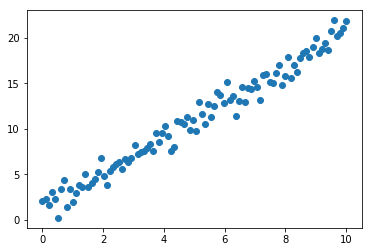

In [4]:
plt.scatter(x,y)
plt.show()

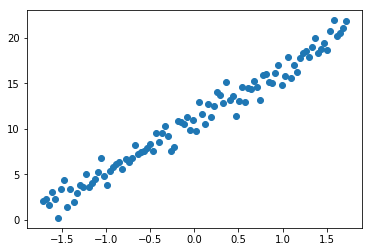

(100,)


In [5]:
##Saling Data for Smaller values
x=(x-x.mean())/x.std()
plt.scatter(x,y)
plt.show()
print(x.shape)

In [6]:
ones=np.ones(x.shape[0])
print(ones.shape)

x = np.array(x)
print(x.shape)

X = np.stack((ones,x),axis=1)
print(X.shape)


(100,)
(100,)
(100, 2)


In [7]:
def hypo(x,theta):
    return theta[1]*x + theta[0]

def gradient(x,y,theta):
    
    grad = np.array([0,0])
    m = x.shape[0]
    
    for ix in range(m):
        hx = hypo(x[ix],theta)
#         print(hx)
        grad[0] += (hx - y[ix])
        grad[1] += (hx - y[ix])*x[ix] 
        
        
    return grad/m

def error(x,y,theta):
    e = 0
    for i in range(x.shape[0]):
        e+= (hypo(x[i],theta) - y[i])**2
    return 0.5*e/x.shape[0]

def gradientDescent(x,y,lr=0.01,threshold =0.001):
    
    theta = np.array([np.random.randn(1),np.random.randn(1)])
    errors=[]
    
    for i in range(800):
            grad = gradient(x,y,theta)
            e = error(x,y,theta)
            errors.append(e)
            theta[0]=theta[0] -lr*grad[0]
            theta[1]=theta[1]-lr*grad[1]
    return theta,errors

    

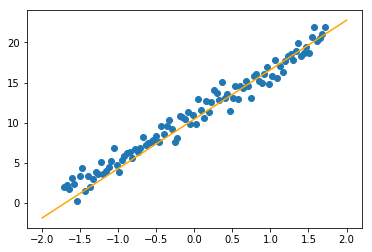

In [8]:
theta,err=gradientDescent(x,y)
plt.scatter(x,y)
xtest=np.linspace(-2,2,10)
plt.plot(xtest,hypo(xtest,theta),color='orange')
plt.show()

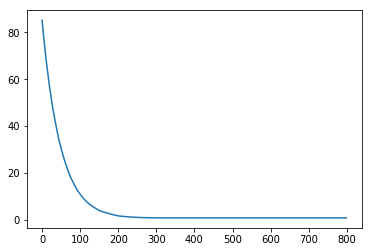

In [9]:
plt.plot(err)
plt.show()